In [1]:
# import PyRosetta library
from pyrosetta import *
init('-mute all')

PyRosetta-4 2023 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python39.Release 2023.12+release.1d8714894eec1dac6443b64d144d220c4aed4f9c 2023-03-20T20:16:16] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.


In [2]:
# clean and load a locally stored PDB
from pyrosetta.toolbox import cleanATOM
cleanATOM("/Users/tgoel/Downloads/1ubq.pdb")
pose = pose_from_pdb("/Users/tgoel/Downloads/1ubq.clean.pdb")

In [3]:
# download a PDB from RCSB
from pyrosetta.toolbox import pose_from_rcsb
pose = pose_from_rcsb("1ubq")

In [4]:
# querying the pose object
print (pose.sequence())
print ("Protein has", pose.total_residue(), "residues.")
print (pose.residue(12))

MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG
Protein has 76 residues.
Residue 12: THR (THR, T):
Base: THR
 Properties: POLYMER PROTEIN CANONICAL_AA SC_ORBITALS POLAR BETA_BRANCHED_SIDECHAIN METALBINDING ALPHA_AA L_AA
 Variant types:
 Main-chain atoms:  N    CA   C  
 Backbone atoms:    N    CA   C    O    H    HA 
 Side-chain atoms:  CB   OG1  CG2  HB   HG1 1HG2 2HG2 3HG2
Atom Coordinates:
   N  : 30.163, 40.338, 10.886
   CA : 29.542, 39.02, 10.653
   C  : 30.494, 38.261, 9.729
   O  : 30.849, 38.85, 8.706
   CB : 28.113, 39.049, 10.015
   OG1: 27.28, 39.722, 10.996
   CG2: 27.588, 37.635, 9.715
   H  : 30.3417, 40.9439, 10.0979
   HA : 29.4347, 38.5136, 11.6126
   HB : 28.1427, 39.6106, 9.08152
   HG1: 27.8142, 39.9642, 11.7563
  1HG2: 26.5941, 37.7021, 9.27299
  2HG2: 28.2623, 37.1367, 9.01871
  3HG2: 27.535, 37.0629, 10.6404
Mirrored relative to coordinates in ResidueType: FALSE



In [5]:
# querying pose geometry
for i in range(1,5):
    print ("phi",i,"=",pose.phi(i))
    print ("psi",i,"=",pose.psi(i))
    print ("omega",i,"=",pose.omega(i))

phi 1 = 0.0
psi 1 = 149.62875148548056
omega 1 = 178.30739658190836
phi 2 = -91.02018604276655
psi 2 = 138.26406631793245
omega 2 = 173.35893762645534
phi 3 = -131.0989165686831
psi 3 = 163.0465472683239
omega 3 = 179.56937652811814
phi 4 = -115.99120425237675
psi 4 = 140.22603528425634
omega 4 = 175.79436394675346


In [6]:
dir(pose)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__residue_accessor',
 '__reslabels_accessor',
 '__scores_accessor',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'aa',
 'add_constraint',
 'add_constraints',
 'alpha',
 'annotated_sequence',
 'append_polymer_residue_after_seqpos',
 'append_pose_by_jump',
 'append_residue_by_atoms',
 'append_residue_by_bond',
 'append_residue_by_jump',
 'apply_transform',
 'apply_transform_Rx_plus_v',
 'assign',
 'atom_tree',
 'batch_get_xyz',
 'batch_set_xyz',
 'beta',
 'center',
 'chain',
 'chain_begin',
 'chain_end',
 'chain_sequence',
 'chi',
 'clear',
 'clear_sequence_constraints',
 'clone',
 'conformation',
 'conformation_ptr',
 '

In [7]:
import numpy
CA = pose.residue(12).atom("CA").xyz()
CA = numpy.array(CA)
CA

array([29.542, 39.02 , 10.653])

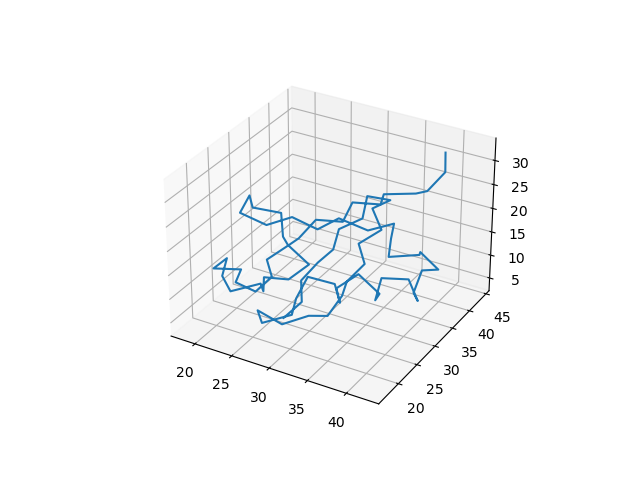

In [8]:
%matplotlib widget
import numpy
import matplotlib.pyplot as plt
CAs = numpy.array([pose.residue(i).atom("CA").xyz() for i in range(1,pose.total_residue()+1)])
ax = plt.axes(projection='3d')
ax.plot3D(CAs[:,0], CAs[:,1], CAs[:,2])
plt.show()

In [9]:
# query length/angle/dihedral
CA = pose.residue(3).atom("CA").xyz()
N = pose.residue(3).atom("N").xyz()
CA_N = (CA-N).length()
print ("CA:N dist",CA_N)

C = pose.residue(3).atom("C").xyz()
C_CA_N = pyrosetta.rosetta.numeric.angle_degrees(C,CA,N)
print ("C:CA:N angle",C_CA_N)

Np1 = pose.residue(4).atom("N").xyz()
NCACNp = pyrosetta.rosetta.numeric.dihedral_degrees(N,CA,C,Np1)
print ("N:CA:C:N(+1) dihedral",NCACNp)

CA:N dist 1.475466028073843
C:CA:N angle 105.66005730491739
N:CA:C:N(+1) dihedral 163.04654726832388


In [10]:
# print the atom names in a residue
for i in range(1,pose.residue_type(2).natoms()+1):
    print (i,pose.residue_type(2).atom_name(i))

1  N  
2  CA 
3  C  
4  O  
5  CB 
6  CG 
7  CD 
8  OE1
9  NE2
10  H  
11  HA 
12 1HB 
13 2HB 
14 1HG 
15 2HG 
16 1HE2
17 2HE2


In [11]:
# query bond connectivity
CA_index = (pose.residue_type(2).atom_index("CA"))
nbrs = pose.residue_type(2).nbrs(CA_index)
print ("Neighbors:")
for i in nbrs:
    print (pose.residue_type(2).atom_name(i))

Neighbors:
 N  
 C  
 CB 
 HA 


In [12]:
# set geometry
pose = pose_from_rcsb("1ubq")
pose.set_phi(5, -60)
pose.set_psi(5, -43)
pose.set_chi(1, 5, 180)

# write PDB to disk
pose.dump_pdb("/Users/tgoel/Downloads/1ubq_modified.pdb")

True

In [13]:
# score a pose with the default energy function
pose = pose_from_rcsb("1ubq")
scorefxn = get_fa_scorefxn()
#scorefxn(pose)
scorefxn.show(pose)

In [14]:
# score a pose with a custom scorefunction
scorefxn = ScoreFunction()
scorefxn.set_weight(rosetta.core.scoring.fa_atr, 1.0)
scorefxn.set_weight(rosetta.core.scoring.fa_rep, 1.0)
scorefxn.set_weight(rosetta.core.scoring.fa_elec, 1.0)

scorefxn.show(pose)

# show the energy of a single residue
pose.energies().show(12)

In [15]:
## generate a model with a given sequence
pose = pose_from_sequence("AKA")
pose.set_phi(1,-120)
pose.set_psi(1,120)
pose.set_phi(2,-60)
pose.set_psi(2,-50)
pose.set_phi(3,-120)
pose.set_psi(3,120)
pose.dump_pdb("/Users/tgoel/Downloads/AKA.pdb")

True

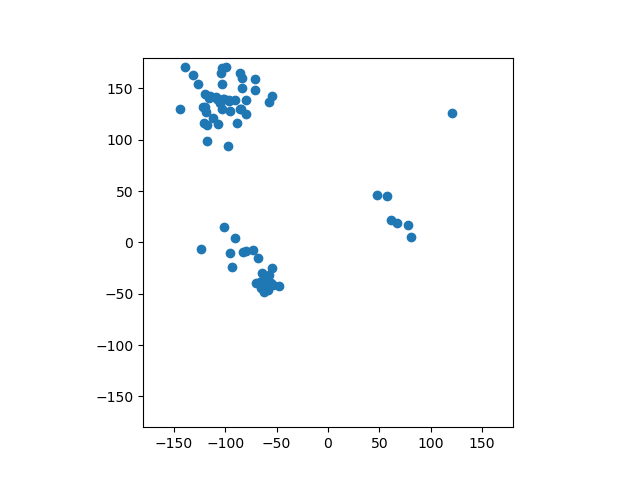

In [16]:
# integration with matplotlib...
# plot the phi/psis in 1oel
import numpy
import matplotlib.pyplot as plt
from pyrosetta.toolbox import pose_from_rcsb

# read the pose, allocate space for storage
pose = pose_from_rcsb("1ubq")
nres = pose.total_residue()
phipsis = numpy.zeros((2,nres-2))

for i in range(2,nres):
    phipsis[0,i-2] = pose.phi(i)
    phipsis[1,i-2] = pose.psi(i)

fig, ax = plt.subplots()
ax.scatter(phipsis[0,:],phipsis[1,:])
ax.set_xlim([-180,180])
ax.set_ylim([-180,180])
ax.set_aspect(1)

In [17]:
# pack (optimize the sidechains of) a pose
scorefxn = get_fa_scorefxn()

pose = pose_from_rcsb("1ubq")

# build packer task
task_pack = standard_packer_task(pose)
task_pack.restrict_to_repacking()

print ("score before packing",scorefxn(pose))

pack_mover = (
   rosetta.protocols.minimization_packing.PackRotamersMover(
     scorefxn, task_pack))
pack_mover.apply(pose)

print ("score after packing",scorefxn(pose))
pose.dump_pdb("/Users/tgoel/Downloads/1ubq_repacked.pdb")

score before packing 32.677753719260835
score after packing -168.90014801156306


True

In [18]:
scorefxn.show(pose)

In [19]:
# pack/design a single residue
scorefxn = get_fa_scorefxn()

#set initial pose
pose = pose_from_sequence("AKA")
pose.set_phi(1,-120)
pose.set_psi(1,120)
pose.set_phi(2,-60)
pose.set_psi(2,-50)
pose.set_phi(3,-120)
pose.set_psi(3,120)

#setup packer task
task_pack = standard_packer_task(pose)
task_pack.restrict_to_repacking()
task_pack.temporarily_fix_everything()
task_pack.temporarily_set_pack_residue(2, True)
pack_mover = (
   rosetta.protocols.minimization_packing.PackRotamersMover(
     scorefxn, task_pack))

#do the packing
pack_mover.apply(pose)
pose.dump_pdb("/Users/tgoel/Downloads/AKA_res2.pdb")

True